## Non-Linear Classification


- In many real life problems, the data is not linearly separable,but we need to classify the data. This can be done using by projecting the data to higer dimesions so that it becomes linearly separable.
<img src="../img/linearly_separable.png" alt="Linear Separable" style="width: 600px;"/>

## Projecting data to higher dimensions!
When working with non-linear datasets, we can project orginal feature vectors into higher dimensional space where they can be linearly separated!  

## Let us see one example


Data in 2-Dimensional Space
<img src="../img/circles_low.png" alt="Linear Separable" style="width: 400px;"/>

Data Projected in 3-D Dimensional Space, after processing the original data using a non-linear function.
<img src="../img/circles_3d.png" alt="Linear Separable" style="width: 400px;"/>

### Code 

In [4]:
from sklearn.datasets import make_circles  ## to generate data
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  ## to make 3d plot
import numpy as np

In [7]:
X,Y = make_circles(n_samples=500,noise=0.02)
## make_circles() function is used to create 2 concentric circles in 2d

In [8]:
print(X.shape,Y.shape)

(500, 2) (500,)


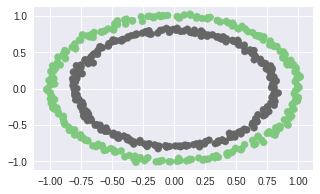

In [11]:
plt.style.use('seaborn')
plt.figure(figsize=(5,3))
plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
plt.show()

In [12]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X.shape[0],3)) ## X bar is transformed array.
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [14]:
X_ = phi(X)  # this function gives us transformed array

(500, 3)


In [15]:
print(X[:3,:])

[[-0.75513461 -0.24136729]
 [-0.78724008  0.22872538]
 [-0.81805224  0.13400707]]


In [16]:
print(X_[:3,:])

[[-0.75513461 -0.24136729  0.62848644]
 [-0.78724008  0.22872538  0.67206224]
 [-0.81805224  0.13400707  0.68716736]]


In [20]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(8,8))
    ## create object 'axes' to create a 3d subplot(refer documentation to understand it)
    ## 111 is id of sub_plot below and pass projection=3d. And fig.subplot() returns an object
    ## we can use this object to use functions to plot in 3d
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,cmap=plt.cm.Accent, depthshade=True)
    ## "zdir=" takes value to be considered as z-axis. So we pass 'z' means take default value(at 3rd place)
    ## depthshade=True gives transparecy to points which are present deep.
    plt.show()

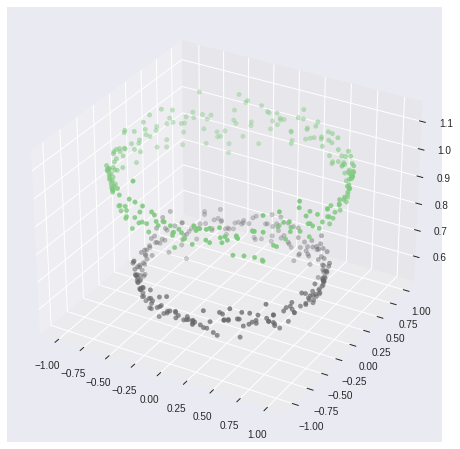

In [25]:
plot3d(X_)

### Logistic Classifier
- Now let us try our Logistic Classifier on X=$[x1,x2]$ and then on X_=$[x1,x2,x3]$

#### Try Logistic Reg. on data with 2features: 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score # to check accuracy

In [28]:
lr = LogisticRegression()  ## create object

In [32]:
acc = cross_val_score(lr,X,Y,cv=5).mean()  ## 5 fold cross-validation
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.8000


In [35]:
lr.fit(X, Y)  ## do training
bias = lr.intercept_
weights = lr.coef_
print(bias, weights)

[-7.03148119e-06] [[0.00262093 0.00096422]]


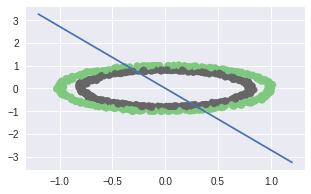

In [39]:
def plotHyperplane(b, w1, w2):    
    plt.figure(figsize=(5,3))
    ## our X_data lies in -1.5 to 1.5(see plot below). So generate 10points in this range
    x_1 = np.linspace(-1.2,1.2,10)
    x_2 = -(w1*x_1+b)/w2 # WT + B = 0
    
    plt.plot(x_1,x_2)
    plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Accent)
    plt.show()    
    
plotHyperplane(bias[0], weights[0][0], weights[0][1])

### Logistic Classifier on Higher Dimension Space
- Now we will see lr on 3d(with 3 features)

In [43]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


### Visualise the Decision Surface

In [44]:
lr.fit(X_,Y)
bias = lr.intercept_
wts = lr.coef_
print(bias, wts)

[8.93042153] [[ 1.68755011e-04  9.61787022e-03 -1.09328006e+01]]


In [45]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))  ## create meshgrid
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [46]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81505632 0.81507176 0.8150872  0.81510263]
 [0.81593605 0.81595149 0.81596692 0.81598236]
 [0.81681578 0.81683121 0.81684665 0.81686208]
 [0.8176955  0.81771094 0.81772637 0.81774181]]


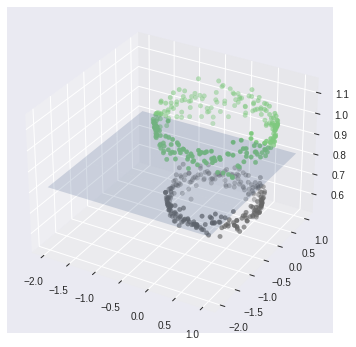

In [49]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')
    
ax.plot_surface(xx,yy,z,alpha=0.2)  ## alpha gives transparency
ax.scatter(X_[:,0],X_[:,1],X_[:,2],zdir='z',s=20,c=Y,cmap=plt.cm.Accent, depthshade=True)
plt.show()